In [64]:
##
import pandas as pd
from sklearn import tree, metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import matplotlib.pyplot as plt
from matplotlib import figure
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [65]:
# Part 1
# CM1
# Import Data for wheat Seed
df_wheat = pd.read_csv('seeds_dataset.txt', sep="\t", error_bad_lines=False, warn_bad_lines=True)
# To construct the data, seven geometric parameters of wheat kernels were measured:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.
# target (three different varieties of wheat): Kama (1), Rosa (2) and Canadian (3)
df_wheat.columns=['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove','target']
wheat_feature = ['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove']
wheat_target = ['Kama', 'Rosa' , 'Canadian', 'wheat']
df_wheat.head()

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [66]:
# Create Decision Tree
X_wheat_Full = df_wheat[['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove']].to_numpy()
Y_wheat_Full = df_wheat['target'].to_numpy()
# Create 10 Fold Data Set
cv = KFold(n_splits=10)
X_wheat, X_wheat_test, Y_wheat, Y_wheat_test = train_test_split(X_wheat_Full, Y_wheat_Full, test_size=0.2, random_state=42)

In [45]:
# For Decision Tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
score = cross_val_score(clf, X_wheat, Y_wheat, cv=cv).mean()
print("Score for entrop :", score)
clf = tree.DecisionTreeClassifier(criterion='gini')
score = cross_val_score(clf, X_wheat, Y_wheat, cv=cv).mean()
print("Score for gini :", score)
# It turns out Gini Works better



Score for entrop : 0.8478021978021978
Score for gini : 0.8478021978021978


In [49]:
clf = tree.DecisionTreeClassifier(splitter='best', criterion='gini')
score = cross_val_score(clf, X_wheat, Y_wheat, cv=cv).mean()
print("Score for best :", score)
clf = tree.DecisionTreeClassifier(splitter='random', criterion='gini')
score = cross_val_score(clf, X_wheat, Y_wheat, cv=cv).mean()
print("Score for random :", score)
# It turns out Random Works better

Score for best : 0.8335164835164836
Score for random : 0.8642857142857142


Text(0.5, 1.0, 'Validation Accuracy at different Tree For Decision Tree')

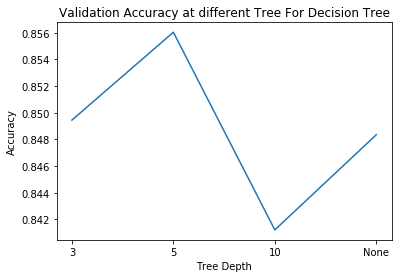

In [50]:
# For Decision Tree
D_Tree = [3, 5, 10]
accuracy = []
for k in D_Tree:
    clf = tree.DecisionTreeClassifier(splitter='random', criterion='gini', max_depth =k)
    score = cross_val_score(clf, X_wheat, Y_wheat, cv=cv).mean()
    accuracy.append(score)
# For Leaf Node to have only 2 data point
clf = tree.DecisionTreeClassifier(splitter='random', criterion='gini', min_samples_leaf = 2)
score = cross_val_score(clf, X_wheat, Y_wheat, cv=cv).mean()
D_Tree.append("None")
accuracy.append(score)
plt.plot(D_Tree, accuracy)
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy at different Tree For Decision Tree")

Final Accuracy for Tree with depth of 5: 0.8636363636363636


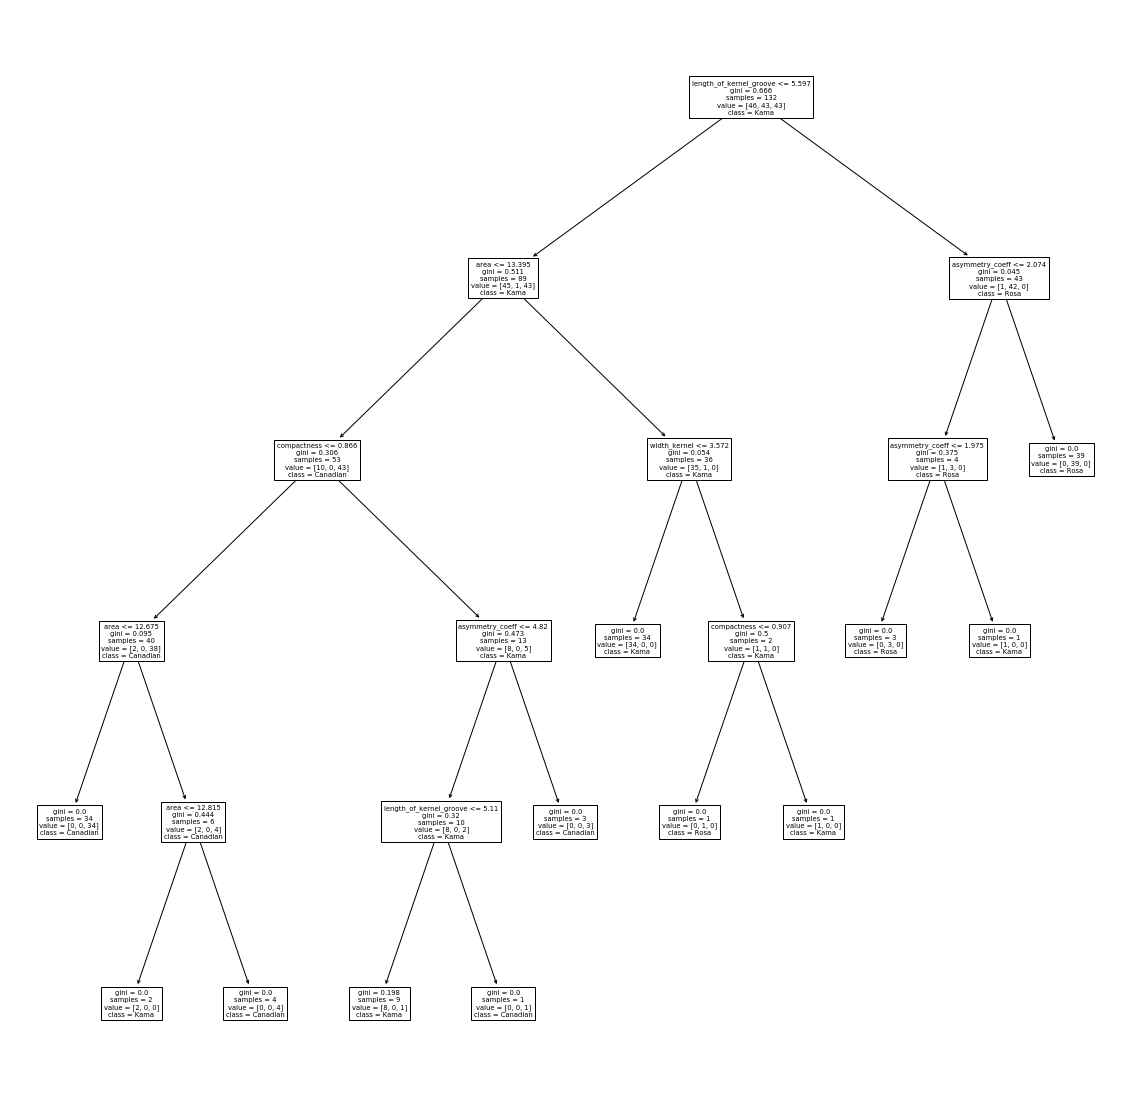

In [53]:
# For Decision Tree
# It turns out the tree with depth of 5 works the best
clf = tree.DecisionTreeClassifier(splitter='best', criterion='gini', max_depth =5)
clf.fit(X_wheat, Y_wheat)
y_out = clf.predict(X_wheat_test)
accuracy = metrics.accuracy_score(Y_wheat_test, y_out)
print("Final Accuracy for Tree with depth of 5:", accuracy)
# Plot the Tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf, feature_names=wheat_feature, class_names=wheat_target);
plt.show()



In [54]:
# For Random Forest Tree
RF_Tree = RandomForestClassifier(criterion='entropy')
score = cross_val_score(RF_Tree, X_wheat, Y_wheat, cv=cv).mean()
print("Score for entrop :", score)
RF_Tree = RandomForestClassifier(criterion='gini')
score = cross_val_score(RF_Tree, X_wheat, Y_wheat, cv=cv).mean()
print("Score for gini :", score)
# It turns out entropy Works better

Score for entrop : 0.9093406593406593
Score for gini : 0.9016483516483517


In [56]:
# For Random Forest Tree
N_Tree = [5, 10, 50, 150, 200]
D_Tree = [3, 5, 10, "None"]
accuracy = np.zeros(shape=(len(N_Tree),len(D_Tree)))

for i in range(len(N_Tree)):
    for j in range(len(D_Tree)):
        if D_Tree[j] != "None":
            RF_Tree = RandomForestClassifier(criterion='entropy', n_estimators = N_Tree[i], max_depth=D_Tree[j])
            score = cross_val_score(RF_Tree, X_wheat, Y_wheat, cv=cv).mean()
        else:
            RF_Tree = RandomForestClassifier(criterion='entropy', n_estimators = N_Tree[i], min_samples_leaf=2)
            score = cross_val_score(RF_Tree, X_wheat, Y_wheat, cv=cv).mean()
        accuracy[i,j] = score

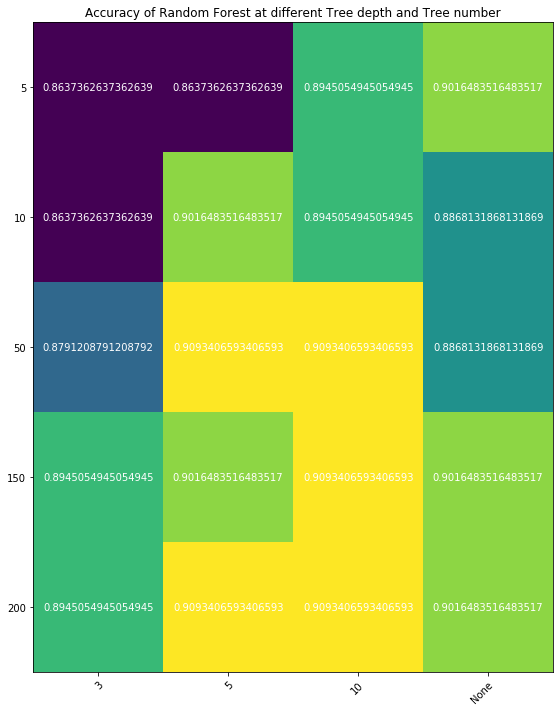

In [58]:
# For Random Forest Tree
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(accuracy)

# We want to show all ticks...
ax.set_xticks(np.arange(len(D_Tree)))
ax.set_yticks(np.arange(len(N_Tree)))
# ... and label them with the respective list entries
ax.set_xticklabels(D_Tree)
ax.set_yticklabels(N_Tree)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(N_Tree)):
    for j in range(len(D_Tree)):
        text = ax.text(j, i, accuracy[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Accuracy of Random Forest at different Tree depth and Tree number")
fig.tight_layout()
plt.show()

Final Accuracy for Random Forest Tree with ree Number 
 to be 50 and depth to be 10: 0.9545454545454546


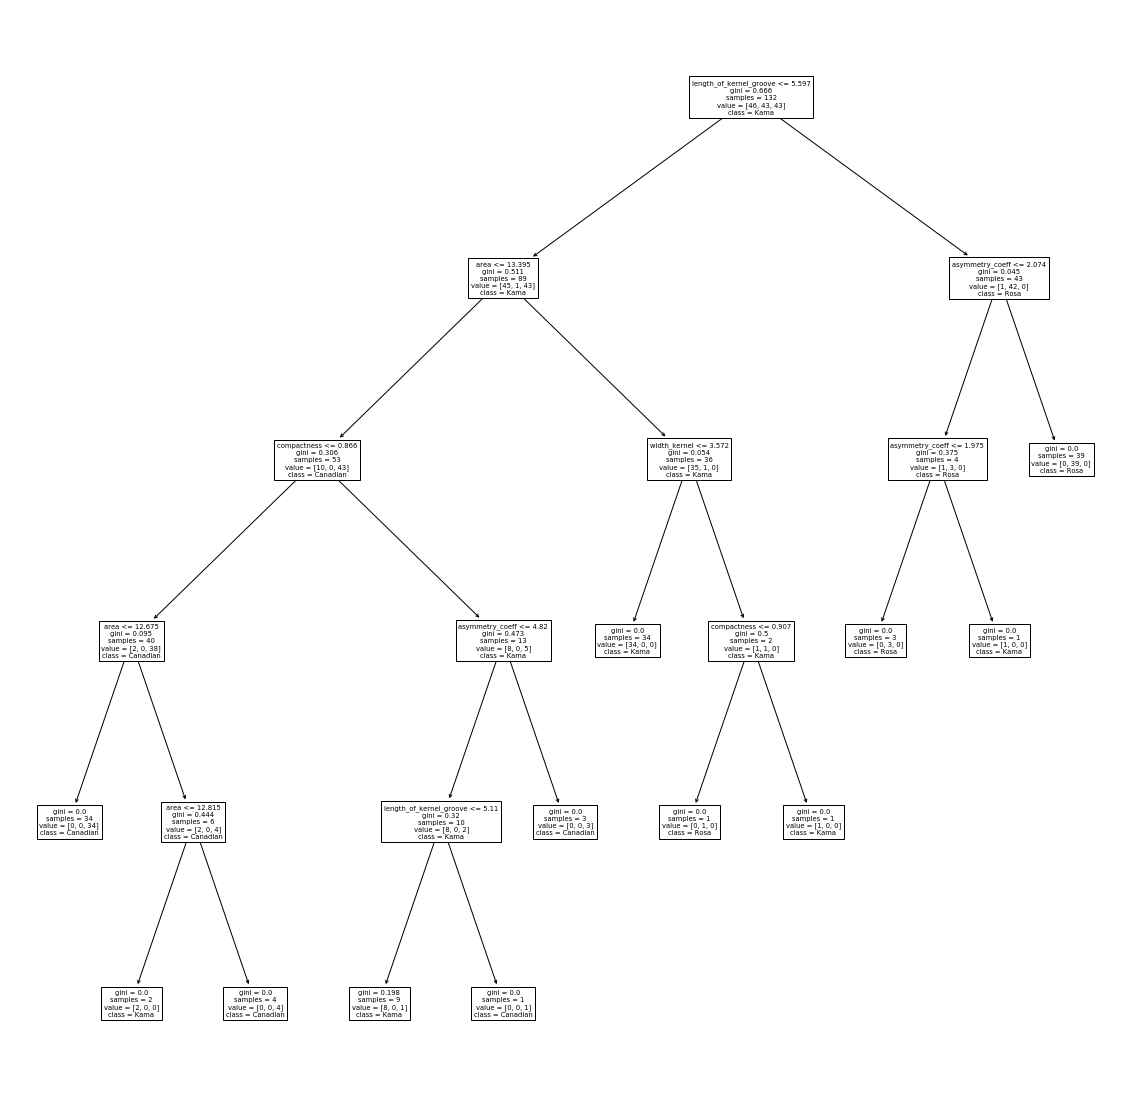

In [61]:
# For Random Forest Tree
# From Color Map, it turns out the Tree Number to be 50 and depth to be 10 will
# be the best choice
RF_Tree = RandomForestClassifier(criterion='entropy', n_estimators = 10, max_depth=50)
RF_Tree.fit(X_wheat, Y_wheat)
y_out = RF_Tree.predict(X_wheat_test)
accuracy = metrics.accuracy_score(Y_wheat_test, y_out)
print("Final Accuracy for Random Forest Tree with ree Number \n to be 50 and depth to be 10:", accuracy)
# Plot the Tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf, feature_names=wheat_feature, class_names=wheat_target);
plt.show()


Text(0.5, 1.0, 'Validation Accuracy at different Tree Depth for Gradient Boost Method')

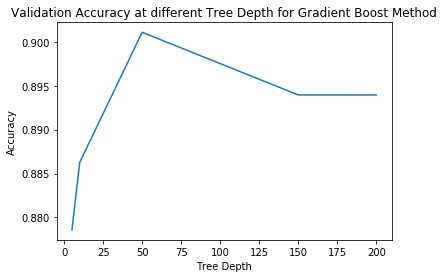

In [62]:
# For Gradient Tree Boosting
N_Tree = [5, 10, 50, 150, 200]
accuracy = []
for k in N_Tree:
    g_tree = GradientBoostingClassifier(n_estimators = k)
    score = cross_val_score(g_tree, X_wheat, Y_wheat, cv=cv).mean()
    accuracy.append(score)
plt.plot(N_Tree, accuracy)
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy at different Tree Depth for Gradient Boost Method")

In [63]:
# It turn out the number of trees at 50 gives the best result
r_tree = GradientBoostingClassifier(n_estimators = 50)
r_tree.fit(X_wheat, Y_wheat)
y_out = RF_Tree.predict(X_wheat_test)
accuracy = metrics.accuracy_score(Y_wheat_test, y_out)
print("Final Accuracy for Gradient Boost Tree with ree Number to be 50:", accuracy)

Final Accuracy for Gradient Boost Tree with ree Number to be 50: 0.9545454545454546


In [2]:
# CM2
# Load Data Set
covid_train = pd.read_csv('covid_train.csv')
# Age Group Replacement
# [<20->0, 20s->1, 30s->2, 40s->3, 50s->4, 60s->5, 70s->6, 80s->7, 90s->8]
mapping = {'<20': 0, '20s': 1, '30s': 2, '40s': 3,
           '50s': 4,  '60s': 5, '70s': 6, '80s': 7, "90s": 8}
covid_train = covid_train.replace({'Age_Group': mapping})
# Sex Group Replacement
# [Male->0, Female ->1]
mapping = {'MALE': 0, 'FEMALE': 1, 'UNSPECIFIED':2, 'GENDER DIVERSE':3}
covid_train = covid_train.replace({'Client_Gender': mapping})
# Case_AcquisitionInfo Replacement
# [NO KNOWN EPI LINK->0, CC ->1, OB ->2, TRAVEL -> 3, MISSING INFORMATION ->4]
mapping = {'NO KNOWN EPI LINK': 0, 'CC': 1, 'OB': 2, 'TRAVEL': 3,
           'MISSING INFORMATION': 4, "UNSPECIFIED EPI LINK": 5}
covid_train = covid_train.replace({'Case_AcquisitionInfo': mapping})
# Reporting_PHU_City Replacement
mapping = {'Barrie': 0, 'Belleville': 1, 'Brantford': 2, 'Brockville': 3,
           'Chatham': 4, "Cornwall": 5, 'Guelph': 6, 'Hamilton': 7, 'Kenora': 8, 'Kingston': 9,
           'London': 10, "Mississauga": 12, "Newmarket": 13, 'Oakville': 14, 'Ottawa': 15, 'Owen Sound': 16, 'Pembroke': 17,
           'Peterborough': 18, "Point Edward": 19, "Port Hope": 20, 'Sault Ste. Marie': 21, 'Simcoe': 22, 'St. Thomas': 23, 'Stratford': 24,
           'Sudbury': 25, "Thorold": 26, 'Toronto': 27, "Waterloo": 28, "Whitby": 29, 'Windsor': 30,'New Liskeard':31,
           'Thunder Bay':32, 'North Bay':33, 'Timmins':34}
covid_train = covid_train.replace({'Reporting_PHU_City': mapping})
# Outbreak_Related
mapping = {'Yes': 1, np.nan:0}
covid_train = covid_train.replace({'Outbreak_Related': mapping})
# Outcome1
mapping = {'Resolved': 0, 'Fatal': 1, 'Not Resolved': 2}
covid_train = covid_train.replace({'Outcome1': mapping})

covid_train = covid_train.dropna()

In [69]:
# Create Decision Tree
X_Covid_Full = covid_train[['Age_Group','Client_Gender','Case_AcquisitionInfo','Reporting_PHU_City','Outbreak_Related','Reporting_PHU_Latitude','Reporting_PHU_Longitude']].to_numpy()
Y_Covid_FUll = covid_train['Outcome1'].to_numpy()
# Create 10 Fold Data Set
X_Covid, X_Covid_test, Y_Covid, Y_Covid_test = train_test_split(X_Covid_Full, Y_Covid_FUll, test_size=0.2, random_state=42)
cv = KFold(n_splits=10)


In [70]:
# For Decision Tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
score = cross_val_score(clf, X_Covid, Y_Covid, cv=cv).mean()
print("Score for entrop :", score)
clf = tree.DecisionTreeClassifier(criterion='gini')
score = cross_val_score(clf, X_Covid, Y_Covid, cv=cv).mean()
print("Score for gini :", score)
# It turns out gini Works better



Score for entrop : 0.6531674509770551
Score for gini : 0.6535874045141106


In [71]:
clf = tree.DecisionTreeClassifier(splitter='best', criterion='gini')
score = cross_val_score(clf, X_Covid, Y_Covid, cv=cv).mean()
print("Score for best :", score)
clf = tree.DecisionTreeClassifier(splitter='random', criterion='gini')
score = cross_val_score(clf, X_Covid, Y_Covid, cv=cv).mean()
print("Score for random :", score)
# It turns out best Works better

Score for best : 0.6541771265023161
Score for random : 0.6527461500713396


Text(0.5, 1.0, 'Validation Accuracy at different Tree For Decision Tree')

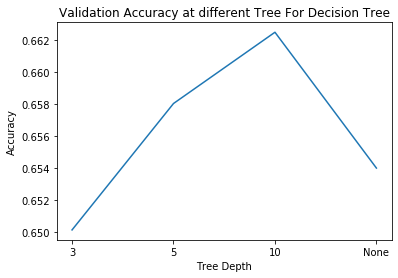

In [72]:
# For Decision Tree
D_Tree = [3, 5, 10]
accuracy = []
for k in D_Tree:
    clf = tree.DecisionTreeClassifier(splitter='best', criterion='gini', max_depth =k)
    score = cross_val_score(clf, X_Covid, Y_Covid, cv=cv).mean()
    accuracy.append(score)
# For Leaf Node to have only 2 data point
clf = tree.DecisionTreeClassifier(splitter='best', criterion='gini', min_samples_leaf = 2)
score = cross_val_score(clf, X_Covid, Y_Covid, cv=cv).mean()
D_Tree.append("None")
accuracy.append(score)
plt.plot(D_Tree, accuracy)
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy at different Tree For Decision Tree")

Final Accuracy for Tree with  depth to be 10: 0.6645335129673291


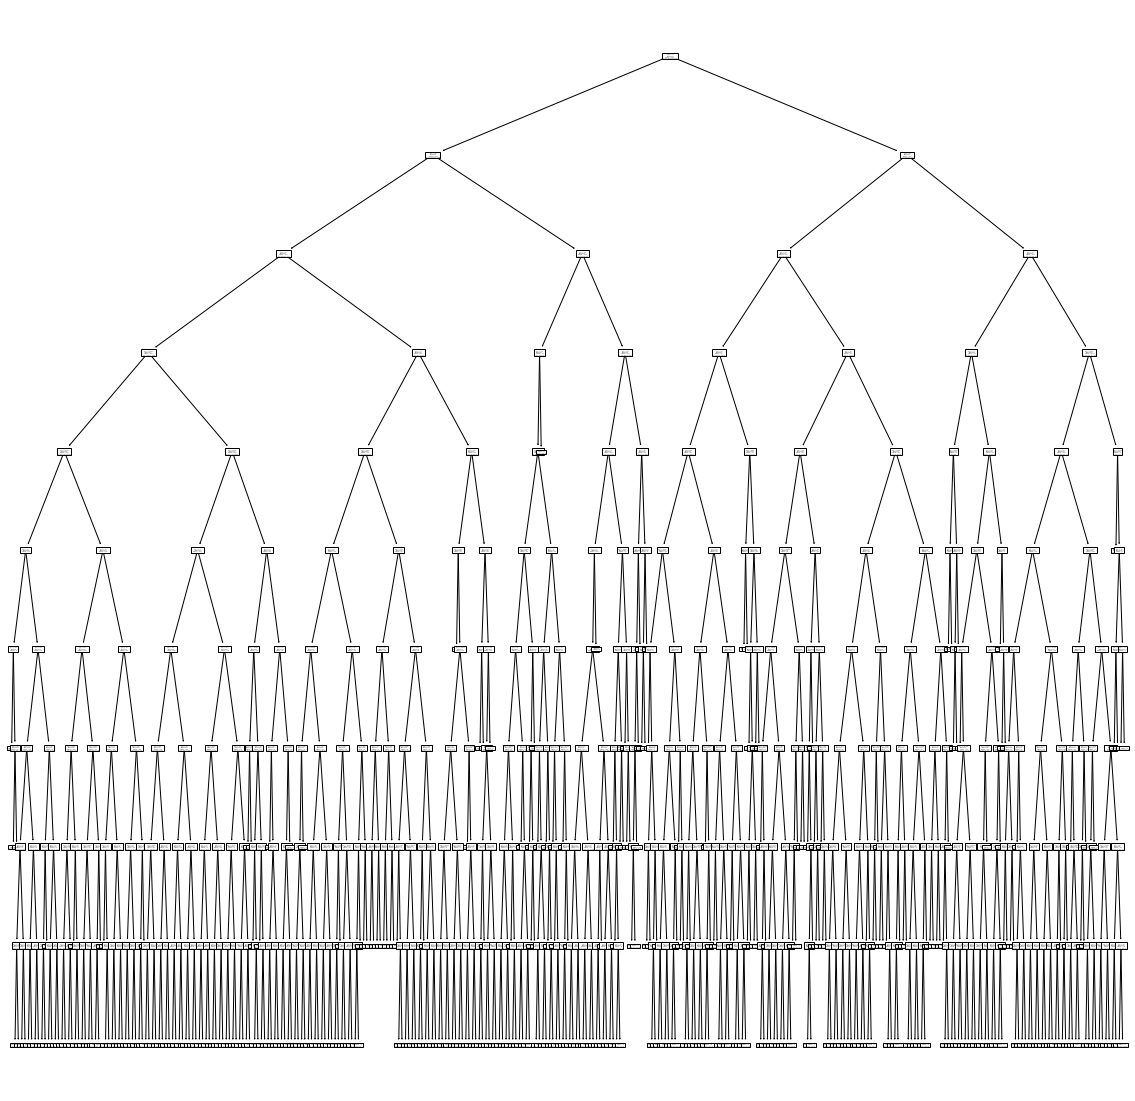

In [73]:
# For Decision Tree
# It turns out the tree with depth of 10 works the best
clf = tree.DecisionTreeClassifier(splitter='best', criterion='gini', max_depth =10)
clf.fit(X_Covid, Y_Covid)
y_out = clf.predict(X_Covid_test)
accuracy = metrics.accuracy_score(Y_Covid_test, y_out)
print("Final Accuracy for Tree with  depth to be 10:", accuracy)
# Plot the Tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf);
plt.show()



In [74]:
# For Random Forest Tree
RF_Tree = RandomForestClassifier(criterion='entropy')
score = cross_val_score(RF_Tree, X_Covid, Y_Covid, cv=cv).mean()
print("Score for entropy :", score)
RF_Tree = RandomForestClassifier(criterion='gini')
score = cross_val_score(RF_Tree, X_Covid, Y_Covid, cv=cv).mean()
print("Score for gini :", score)
# It turns out entropy Works better

Score for entropy : 0.6568725729635585
Score for gini : 0.6586408879584955


In [75]:
# For Random Forest Tree
N_Tree = [5, 10, 50, 150, 200]
D_Tree = [3, 5, 10, "None"]
accuracy = np.zeros(shape=(len(N_Tree),len(D_Tree)))

for i in range(len(N_Tree)):
    for j in range(len(D_Tree)):
        if D_Tree[j] != "None":
            RF_Tree = RandomForestClassifier(criterion='entropy', n_estimators = N_Tree[i], max_depth=D_Tree[j])
            score = cross_val_score(RF_Tree, X_Covid, Y_Covid, cv=cv).mean()
        else:
            RF_Tree = RandomForestClassifier(criterion='entropy', n_estimators = N_Tree[i], min_samples_leaf=2)
            score = cross_val_score(RF_Tree, X_Covid, Y_Covid, cv=cv).mean()
        accuracy[i,j] = score

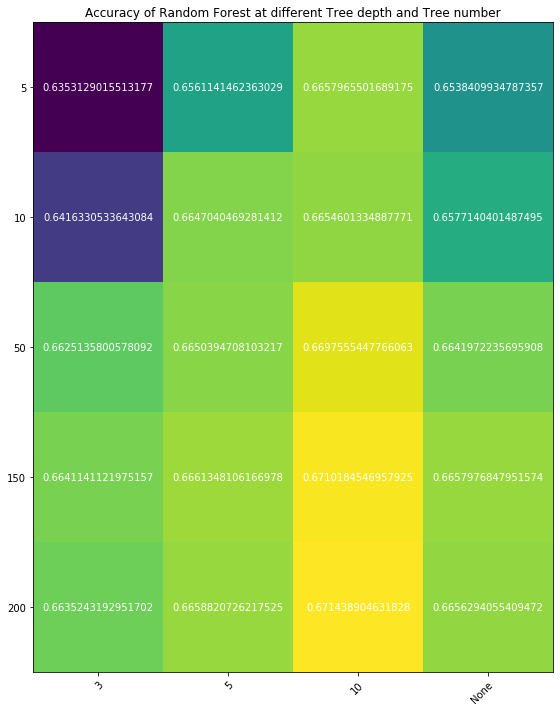

In [78]:
# For Random Forest Tree
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(accuracy)

# We want to show all ticks...
ax.set_xticks(np.arange(len(D_Tree)))
ax.set_yticks(np.arange(len(N_Tree)))
# ... and label them with the respective list entries
ax.set_xticklabels(D_Tree)
ax.set_yticklabels(N_Tree)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(N_Tree)):
    for j in range(len(D_Tree)):
        text = ax.text(j, i, accuracy[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Accuracy of Random Forest at different Tree depth and Tree number")
fig.tight_layout()
plt.show()

Final Accuracy for Tree with depth to be 10 and Tree number to be 200: 0.6581340518693163


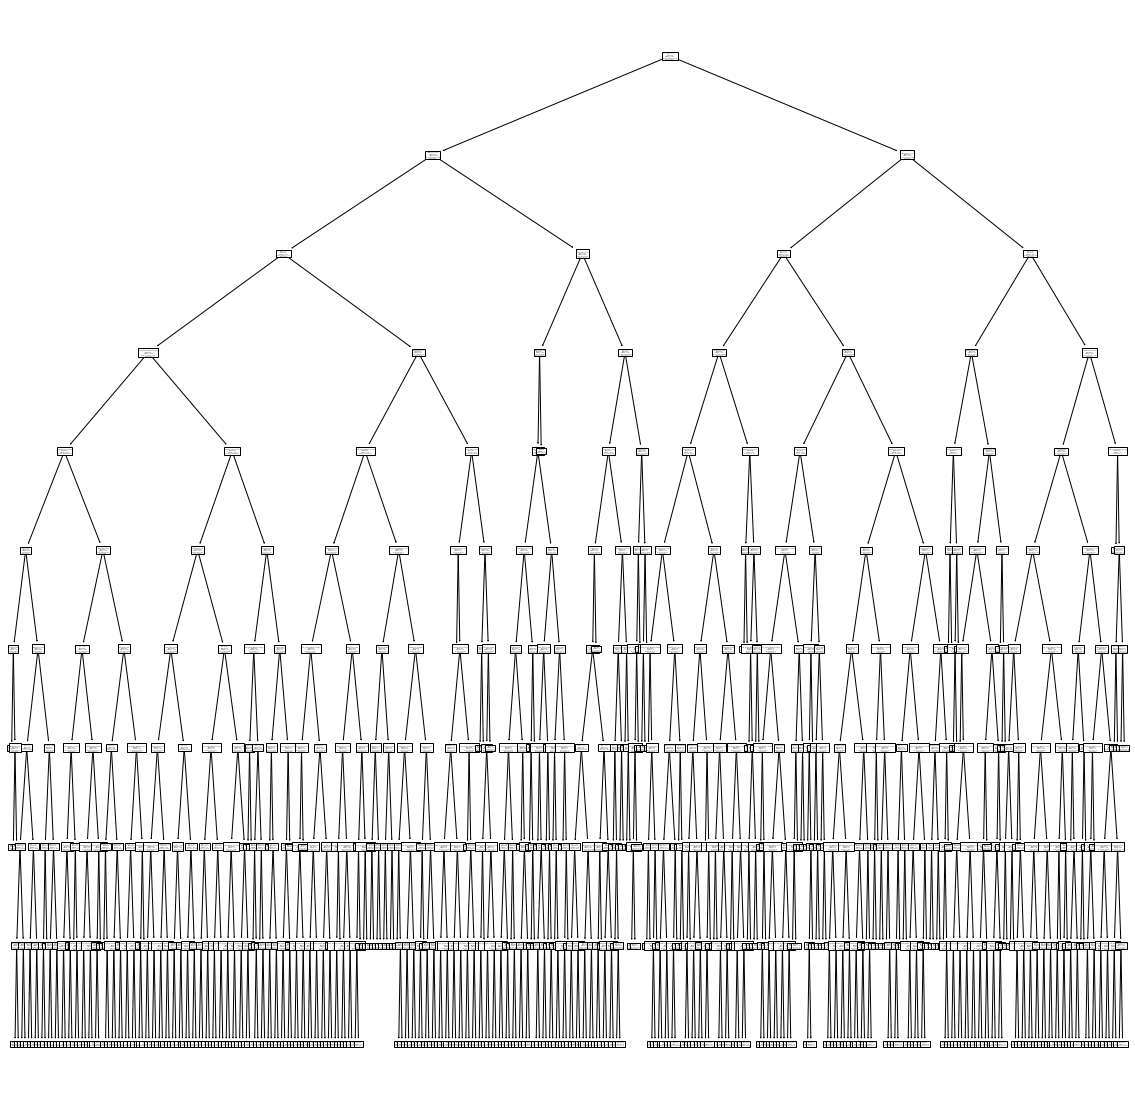

In [79]:
# For Random Forest Tree
# From Color Map, it turns out the Tree Number to be 200 and depth to be 10 will
# be the best choice
RF_Tree = RandomForestClassifier(criterion='entropy', n_estimators = 200, max_depth=10)
RF_Tree.fit(X_Covid, Y_Covid)
y_out = RF_Tree.predict(X_Covid_test)
accuracy = metrics.accuracy_score(Y_Covid_test, y_out)
print("Final Accuracy for Tree with depth to be 10 and Tree number to be 200:", accuracy)
# Plot the Tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf, feature_names=wheat_feature, class_names=wheat_target);
plt.show()

Text(0.5, 1.0, 'Validation Accuracy at different Tree Depth for Gradient Boost Method')

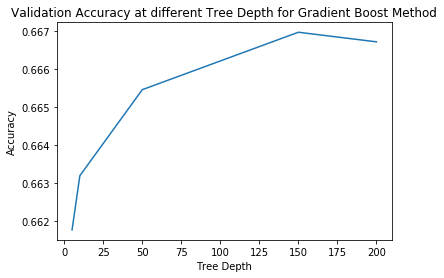

In [86]:
# For Gradient Tree Boosting
N_Tree = [5, 10, 50, 150, 200]
accuracy = []
for k in N_Tree:
    g_tree = GradientBoostingClassifier(n_estimators = k)
    score = cross_val_score(g_tree, X_Covid, Y_Covid, cv=cv).mean()
    accuracy.append(score)
plt.plot(N_Tree, accuracy)
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy at different Tree Depth for Gradient Boost Method")

In [83]:
# It turn out the number of trees at 150 gives the best result
r_tree = GradientBoostingClassifier(n_estimators = 150)
r_tree.fit(X_Covid, Y_Covid)
y_out = r_tree.predict(X_Covid_test)
accuracy = metrics.accuracy_score(Y_Covid_test, y_out)
print("Final Accuracy for Tree with depth to be 10 and Tree number to be 200:", accuracy)

Final Accuracy for Tree with depth to be 10 and Tree number to be 200: 0.6665543954193331


In [ ]:
# Kaggle
# Load Data Set
covid_test = pd.read_csv('covid_tests.csv')
# Age Group Replacement
# [<20->0, 20s->1, 30s->2, 40s->3, 50s->4, 60s->5, 70s->6, 80s->7, 90s->8]
mapping = {'<20': 0, '20s': 1, '30s': 2, '40s': 3,
           '50s': 4,  '60s': 5, '70s': 6, '80s': 7, "90s": 8}
covid_test = covid_test.replace({'Age_Group': mapping})
# Sex Group Replacement
# [Male->0, Female ->1]
mapping = {'MALE': 0, 'FEMALE': 1, 'UNSPECIFIED':2, 'GENDER DIVERSE':3}
covid_test = covid_test.replace({'Client_Gender': mapping})
# Case_AcquisitionInfo Replacement
# [NO KNOWN EPI LINK->0, CC ->1, OB ->2, TRAVEL -> 3, MISSING INFORMATION ->4]
mapping = {'NO KNOWN EPI LINK': 0, 'CC': 1, 'OB': 2, 'TRAVEL': 3,
           'MISSING INFORMATION': 4, "UNSPECIFIED EPI LINK": 5}
covid_test = covid_test.replace({'Case_AcquisitionInfo': mapping})
# Reporting_PHU_City Replacement
mapping = {'Barrie': 0, 'Belleville': 1, 'Brantford': 2, 'Brockville': 3,
           'Chatham': 4, "Cornwall": 5, 'Guelph': 6, 'Hamilton': 7, 'Kenora': 8, 'Kingston': 9,
           'London': 10, "Mississauga": 12, "Newmarket": 13, 'Oakville': 14, 'Ottawa': 15, 'Owen Sound': 16, 'Pembroke': 17,
           'Peterborough': 18, "Point Edward": 19, "Port Hope": 20, 'Sault Ste. Marie': 21, 'Simcoe': 22, 'St. Thomas': 23, 'Stratford': 24,
           'Sudbury': 25, "Thorold": 26, 'Toronto': 27, "Waterloo": 28, "Whitby": 29, 'Windsor': 30,'New Liskeard':31,
           'Thunder Bay':32, 'North Bay':33, 'Timmins':34}
covid_test = covid_test.replace({'Reporting_PHU_City': mapping})
# Outbreak_Related
mapping = {'Yes': 1, np.nan:0}
covid_test = covid_test.replace({'Outbreak_Related': mapping})
# Outcome1
output = r_tree.predict(covid_test)
output = np.array(output)
id = np.zeros(3713)
output = np.vstack((id, output)).transpose()
for i in range(3713):
    output[i, 0] = i
output = pd.DataFrame(output,columns=['id','Outcome1'])
output = output.astype(int)
mapping = {0:'Resolved', 1:'Fatal', 2:'Not Resolved'}
output = output.replace({'Outcome1': mapping})
output.to_csv(r'E:\Study\Master\ECE657a\Assignment\Assignment2\output.csv', index=False, header=True)

Text(0.5, 1.0, 'Validation Accuracy at different smoothing parameter')

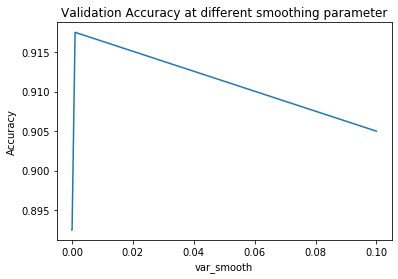

In [87]:
# CM4
var_smooth = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
accuracy = []
for k in var_smooth:
    G_NB = GaussianNB(var_smoothing=k)
    score = cross_val_score(G_NB, X_wheat, Y_wheat, cv=cv).mean()
    accuracy.append(score)

plt.plot(var_smooth, accuracy)
plt.xlabel("var_smooth")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy at different smoothing parameter")

# %%
# From the plot, it turns out that smoothing parameter equal to 1*e^-9
# Provides the best result

In [88]:
G_NB = GaussianNB(var_smoothing=1e-9)
G_NB.fit(X_wheat, Y_wheat)
y_out = G_NB.predict(X_wheat_test)
accuracy = metrics.accuracy_score(Y_wheat_test, y_out)
print("Final Accuracy for Naive Bayes:", accuracy)

Final Accuracy for Naive Bayes: 0.925


Text(0.5, 1.0, 'Validation Accuracy at different smoothing parameter')

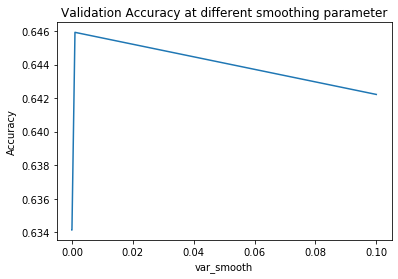

In [89]:
# CM5
var_smooth = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
accuracy = []
for k in var_smooth:
    G_NB = GaussianNB(var_smoothing=k)
    score = cross_val_score(G_NB, X_Covid, Y_Covid, cv=cv).mean()
    accuracy.append(score)

plt.plot(var_smooth, accuracy)
plt.xlabel("var_smooth")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy at different smoothing parameter")

# %%
# From the plot, it turns out that smoothing parameter equal to 1*e^-9
# Provides the best result

In [90]:
G_NB = GaussianNB(var_smoothing=1e-9)
G_NB.fit(X_Covid, Y_Covid)
y_out = G_NB.predict(X_Covid_test)
accuracy = metrics.accuracy_score(Y_Covid_test, y_out)
print("Final Accuracy for Naive Bayes:", accuracy)

Final Accuracy for Naive Bayes: 0.6423038059952846
